## Measures of Descriptive statistics-Central Tendency, spread

### Here there is a house_price.csv file which contains property prices in the city of Bangalore.Then want to examine the price per square feet and do the following.

###### Detect the outliers and remove it using:
###### Mean Function
###### Percentile method
###### IQR(Inter quartile range method)
###### Normal distribution
###### Zscore method

###### Also, ploted the box plot,histplot,scatter plot and added heatmap.



In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [155]:
from scipy.stats import skew,kurtosis

In [156]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [157]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [158]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [159]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [160]:
df1=df.drop_duplicates()
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


### 1.MEAN FUNCTION METHOD

In [161]:
df1.price_per_sqft.mean() 

8132.641840177763

In [162]:
df1.price_per_sqft.median()

5500.0

##### There is a significant difference between mean and median represents the presence of outliers.

<Axes: xlabel='price_per_sqft', ylabel='Count'>

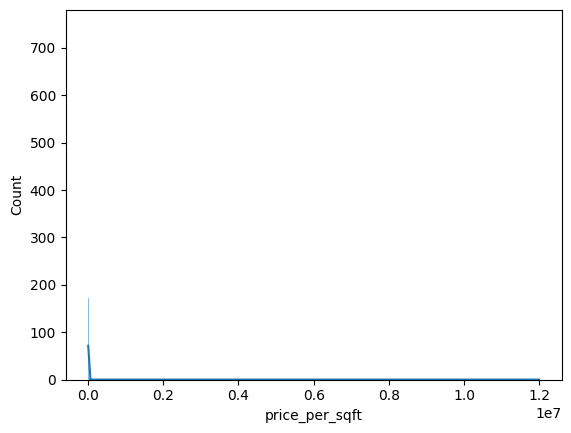

In [203]:
sns.histplot(data=df1,x=df1.price_per_sqft, kde=True)

In [164]:
df1.price_per_sqft.skew()

103.90203228991889

In [165]:
kurtosis(df1['price_per_sqft'],fisher=False)

11134.230839805388

### Corelation matrix

<Axes: >

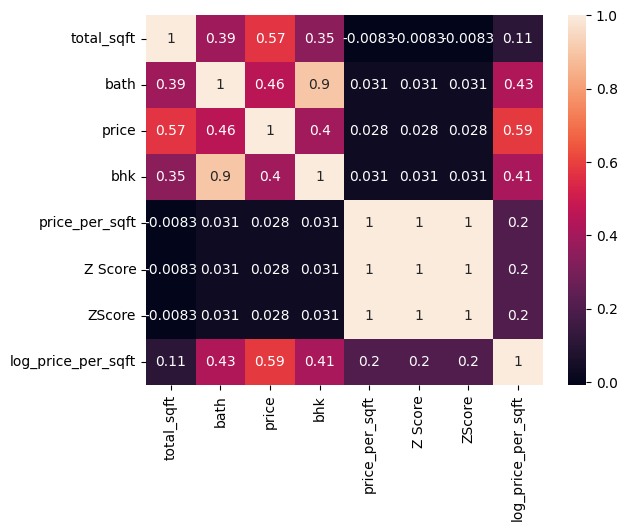

In [253]:
df1corr=df.drop(columns=["location","size",],axis=1)
corr=df1corr.corr()
sns.heatmap(corr,annot=True)

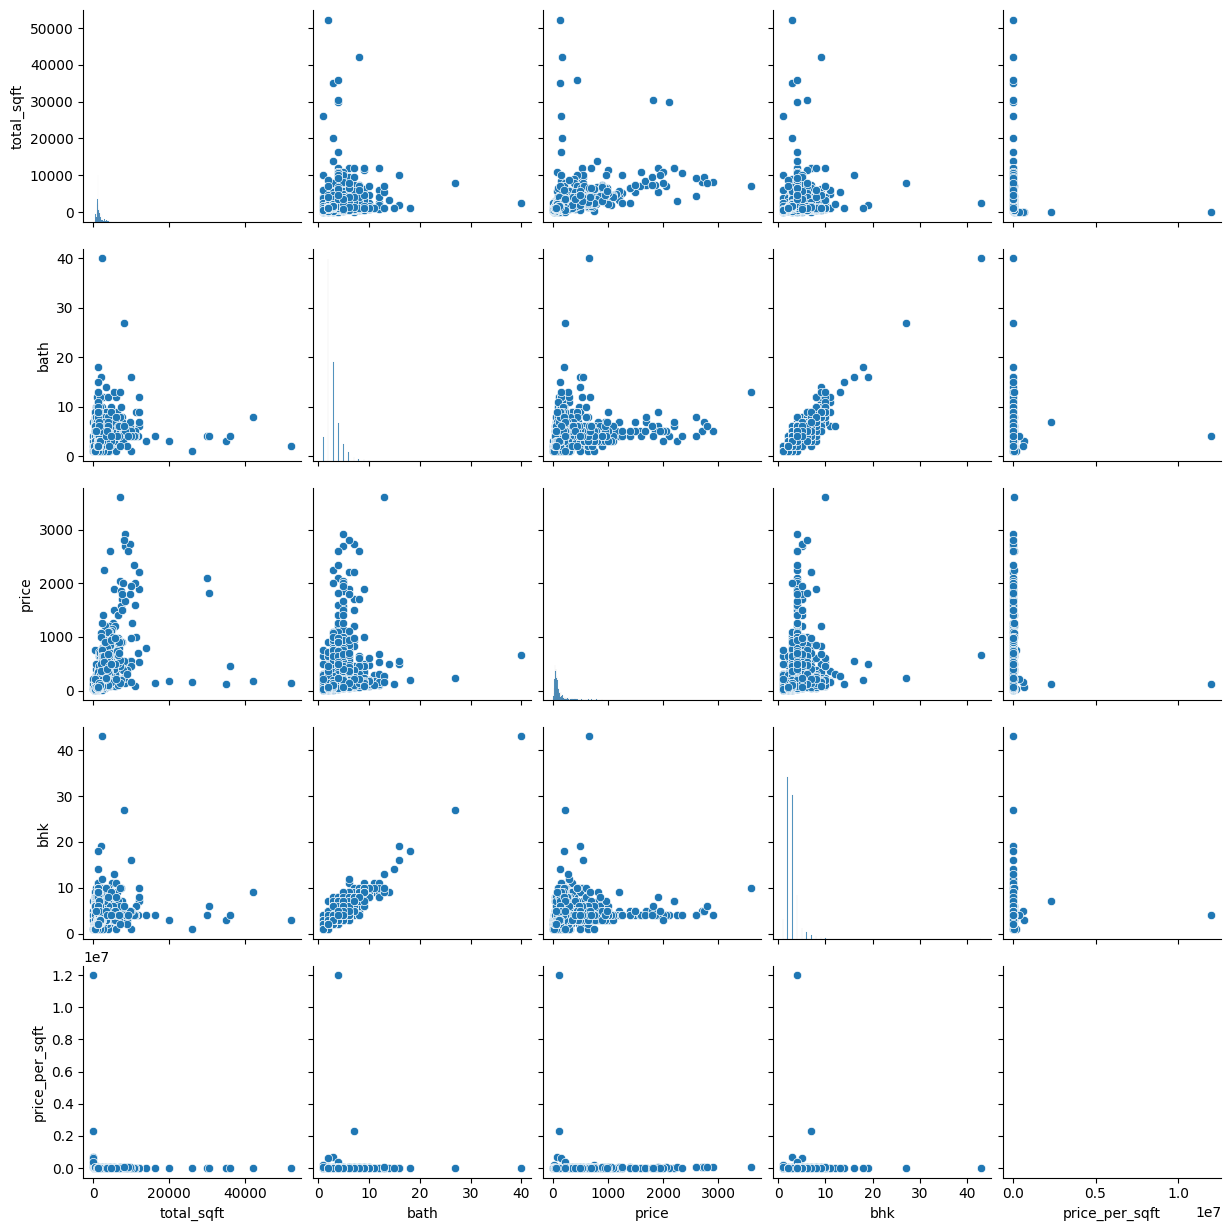

In [255]:
sns.pairplot(df1)
plt.show()

#### 2.USING PERCENTILE METHOD

In [166]:
lb = df1.price_per_sqft.quantile([0.01])
ub = df1.price_per_sqft.quantile([0.99])
lb,ub

(0.01    2532.0
 Name: price_per_sqft, dtype: float64,
 0.99    24000.0
 Name: price_per_sqft, dtype: float64)

#### The values outside 1st and 99th percentile is considered as outliers

#### outliers

In [250]:
df1[(df1.price_per_sqft<2532) | (df1.price_per_sqft>24000)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
130,Electronic City,2 BHK,880.0,1.0,16.5,2,1875
169,Attibele,1 BHK,450.0,1.0,11.0,1,2444
...,...,...,...,...,...,...,...
12948,other,10 Bedroom,7150.0,13.0,3600.0,10,50349
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000


#### without outliers

In [248]:
df2=df1[(df1.price_per_sqft>2532) & (df1.price_per_sqft<24000)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: xlabel='price_per_sqft', ylabel='Count'>

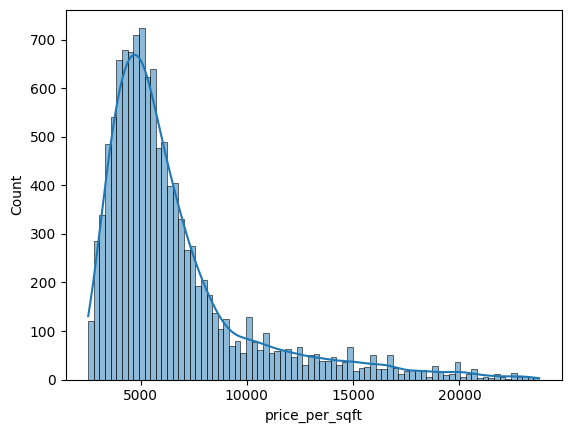

In [169]:
sns.histplot(data=df2,x=df2.price_per_sqft,kde=True)

In [233]:
df2.price_per_sqft.skew()

1.9791313646318311

In [222]:
df2['log_price_per_sqft']=np.log(df2["price_per_sqft"])
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_10544\106179483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_price_per_sqft']=np.log(df2["price_per_sqft"])


,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,8.784162
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506


<Axes: xlabel='log_price_per_sqft', ylabel='Count'>

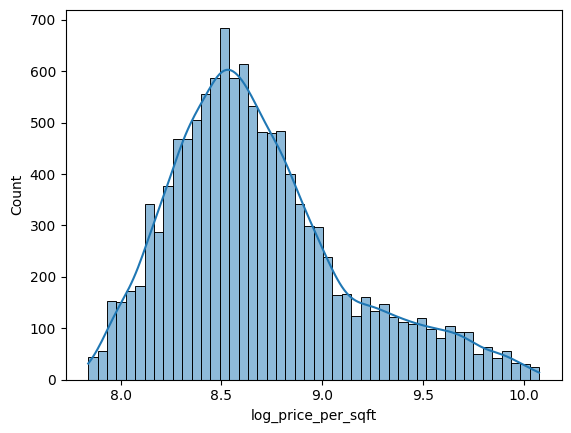

In [224]:
sns.histplot(data=df2,x=df2.log_price_per_sqft, kde=True)

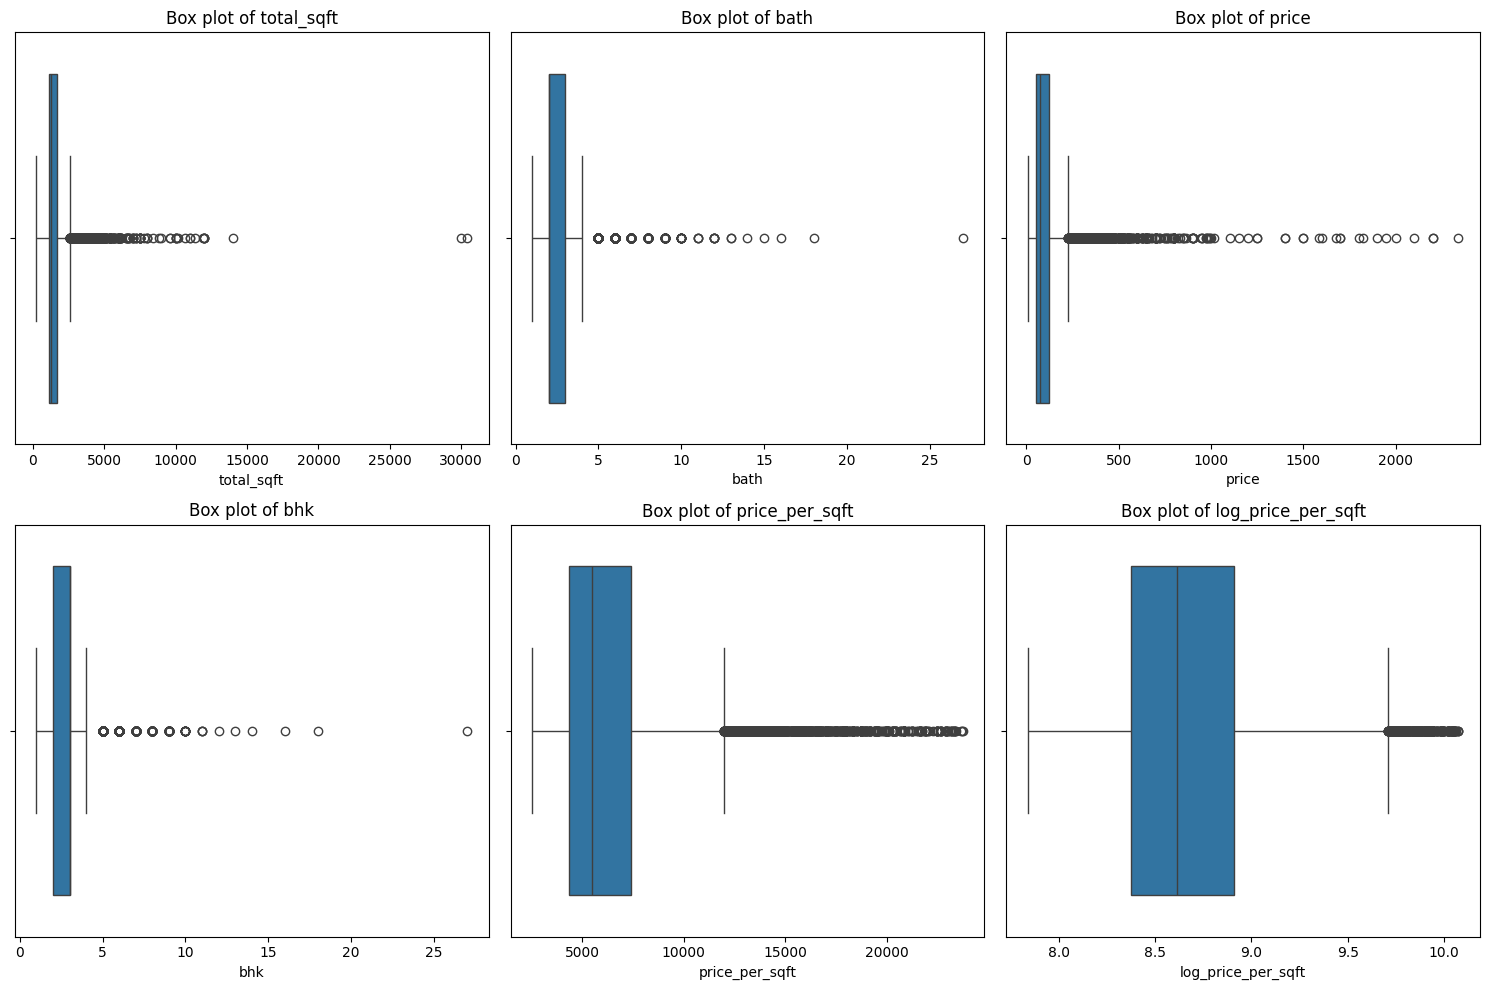

In [232]:
plt.figure(figsize=(15, 10))
numerical_cols=['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft','log_price_per_sqft']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df2[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [226]:
df2.log_price_per_sqft.skew()

0.7947311263008594

In [230]:
kurtosis(df2["log_price_per_sqft"],fisher=False)

3.3237333816668446

##### From percentile method we got moderately skewed value and kurtosis value is greater than 3.

#### 3. IQR

In [173]:
q1=df1.price_per_sqft.quantile(0.25)
q1

4312.0

In [174]:
q3=df1.price_per_sqft.quantile(0.75)
q3

7461.0

In [175]:
iqr=q3-q1
iqr

3149.0

#### Upper and lower whisker

In [176]:
L_W=q1-iqr*1.5
U_W=q3+iqr*1.5
L_W,U_W

(-411.5, 12184.5)

#### The values outside the range treated as outliers

#### Outliers

In [177]:
df1[(df1.price_per_sqft<-411.5) | (df1.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


#### without outliers

In [178]:
df3=df1[(df1.price_per_sqft>-411.5) & (df1.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: xlabel='price_per_sqft', ylabel='Count'>

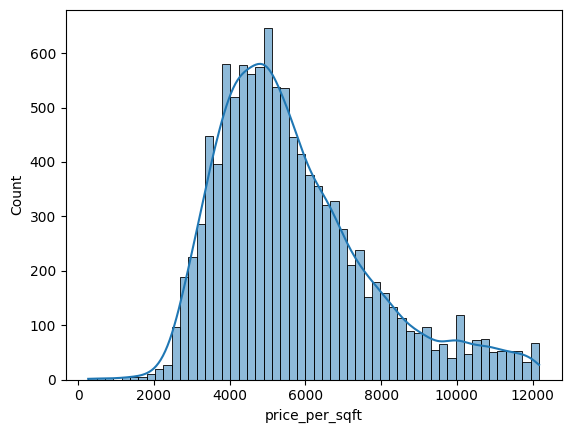

In [179]:
sns.histplot(data=df3,x=df3.price_per_sqft,kde=True)

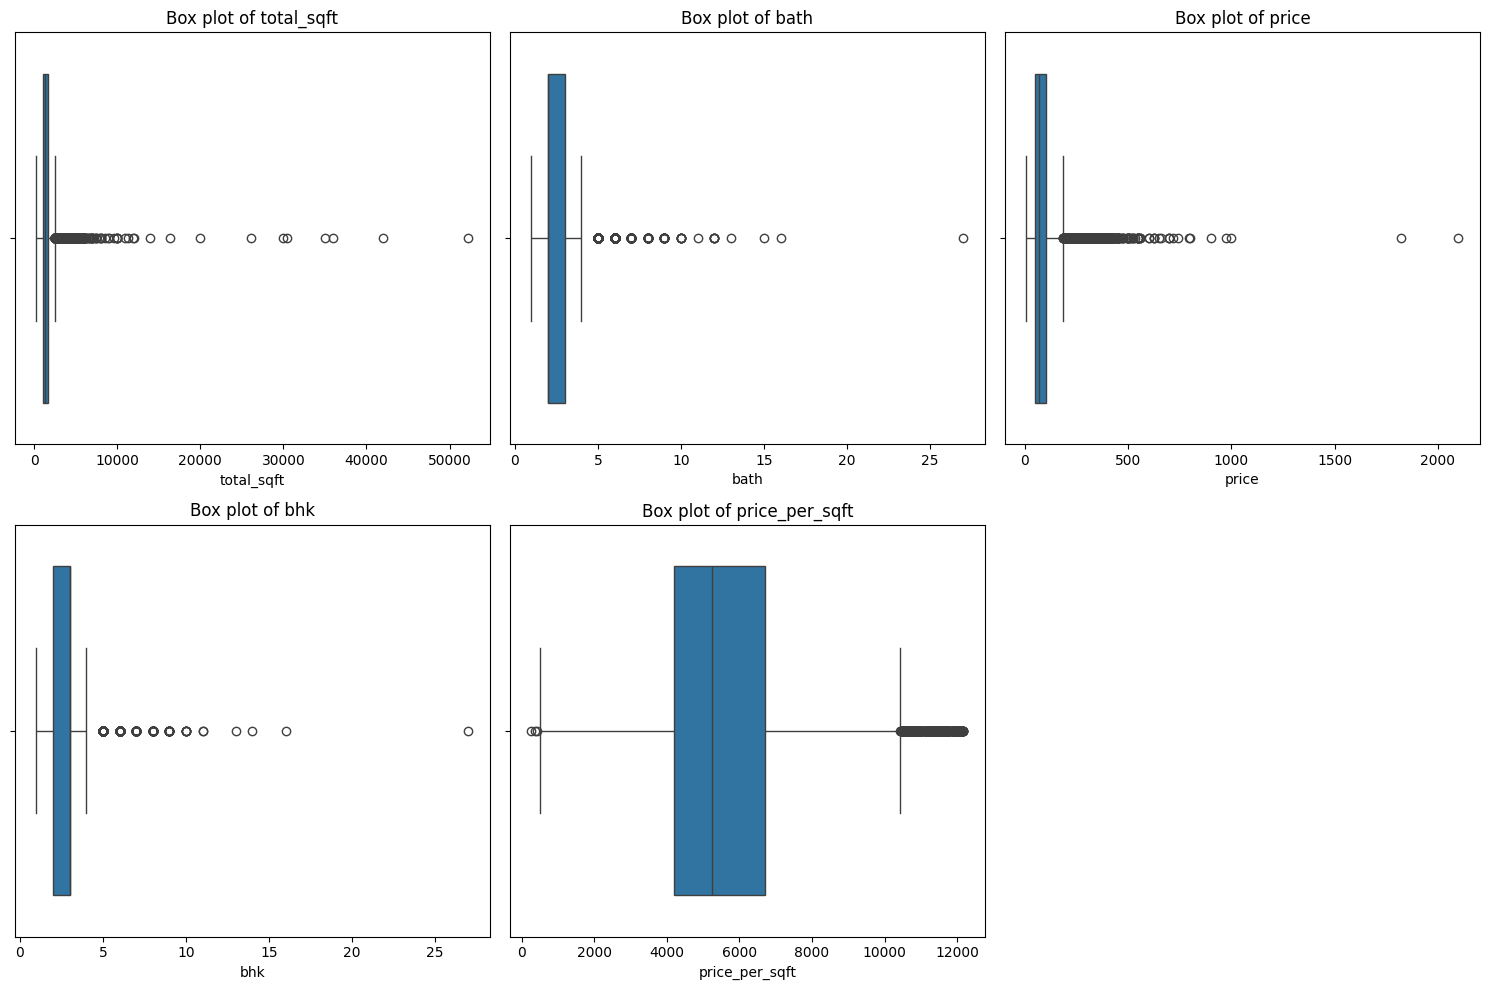

In [180]:
plt.figure(figsize=(15, 10))
numerical_cols=['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df3[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [181]:
df3.price_per_sqft.skew()

0.977839864547141

In [182]:
kurtosis(df3['price_per_sqft'],fisher=False)

3.7158216744424215

#### From the IQR method without outliers we get moderately skewed value which is close to 1 and kurtosis value is greater than 3.

### 4. Normal distribution

In [183]:
m=df1.price_per_sqft.mean()
m

8132.641840177763

In [184]:
s=df1.price_per_sqft.std()
s

111232.90089570847

In [185]:
m-3*s

-325566.06084694766

In [186]:
m+3*s

341831.3445273032

#### Outliers

In [187]:
df1[(df1.price_per_sqft<-325566.06084694766) | (df1.price_per_sqft>341831.3445273032)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


#### Without outliers

In [188]:
df4=df1[(df1.price_per_sqft>-325566.06084694766) & (df1.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: xlabel='price_per_sqft', ylabel='Count'>

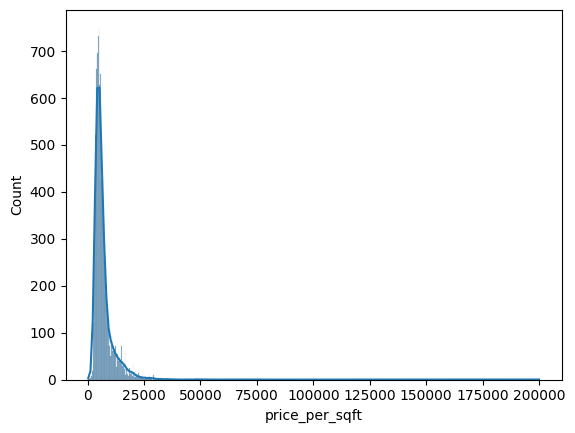

In [189]:
sns.histplot(data=df4,x=df4.price_per_sqft,kde=True)

In [207]:
df4.price_per_sqft.skew()

10.522738553105086

In [208]:
kurtosis(df4['price_per_sqft'],fisher=False)

312.9634670607257

In [210]:
df4['log_price_per_sqft']=np.log(df4["price_per_sqft"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_10544\1925556773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['log_price_per_sqft']=np.log(df4["price_per_sqft"])


In [211]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,log_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,8.215818
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,8.437067
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,8.354674
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530,8.784162
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,8.808220
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,9.315691
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,8.567506


<Axes: xlabel='log_price_per_sqft', ylabel='Count'>

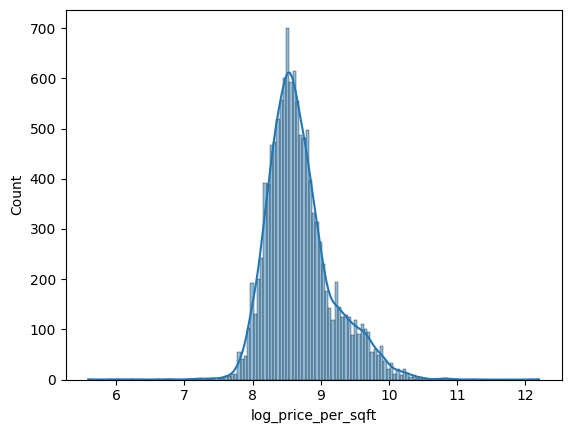

In [212]:
sns.histplot(data=df4,x=df4.log_price_per_sqft, kde=True)

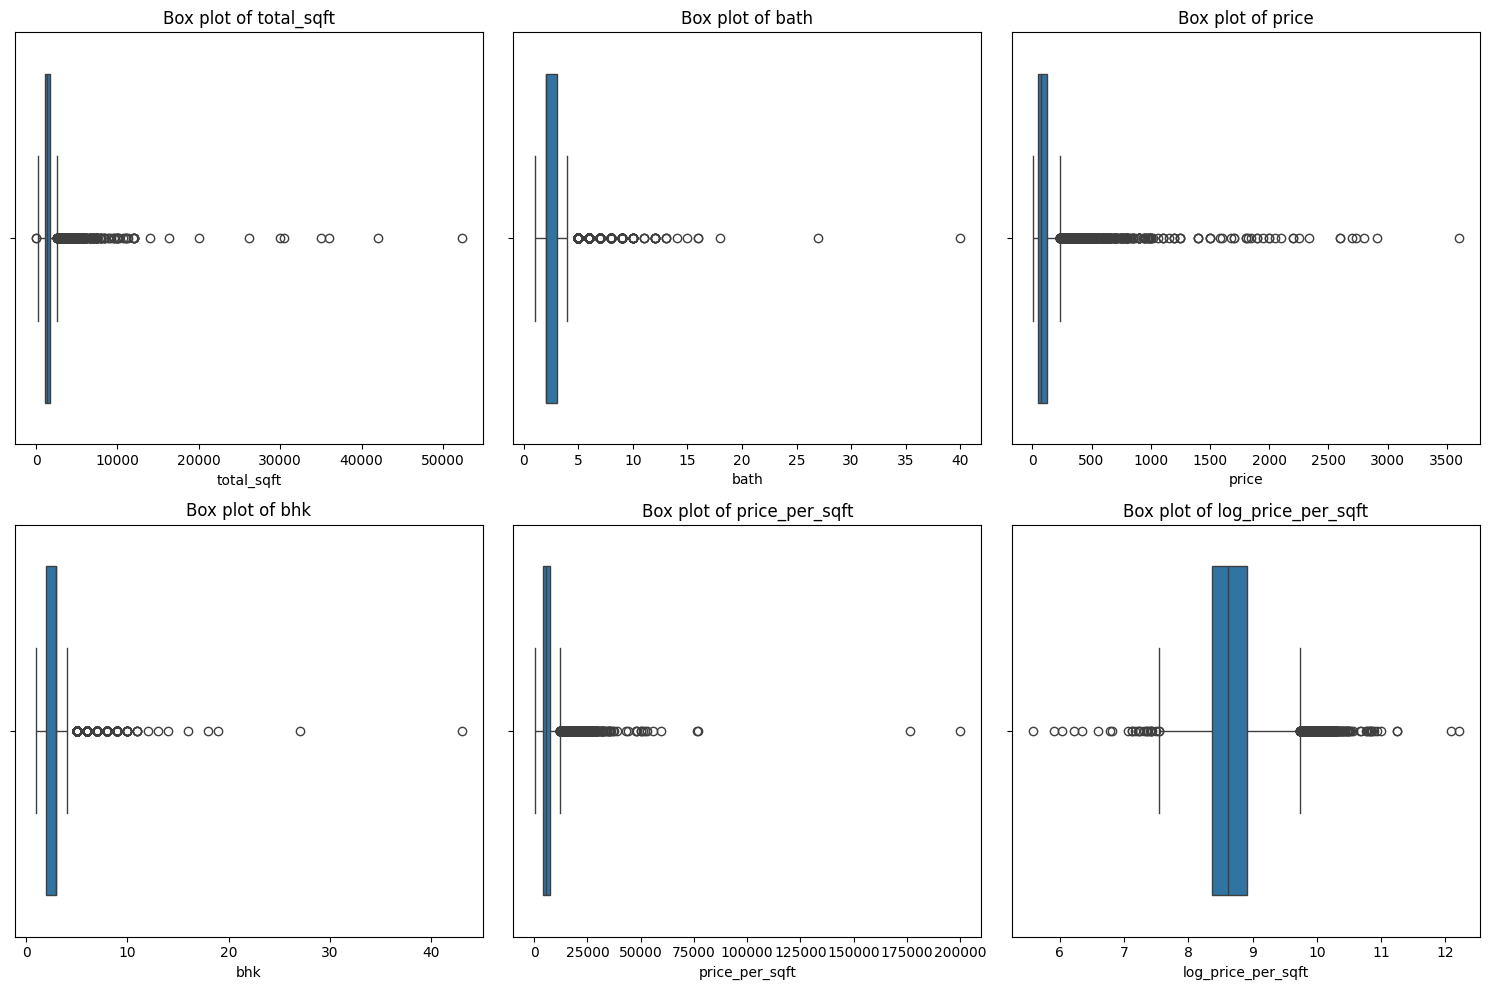

In [244]:
plt.figure(figsize=(15, 10))
numerical_cols=['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft','log_price_per_sqft']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df4[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [237]:
df4.log_price_per_sqft.skew()

0.8479649839006448

In [214]:
kurtosis(df4['log_price_per_sqft'],fisher=False)

4.853764316108764

#### From normal distribution without outliers we got a moderately skewed normal distribution.

### 5. Z Score

In [193]:
df["ZScore"]=(df.price_per_sqft-m)/std
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906,-0.034906
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843,-0.025843
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.020447,0.020447


In [194]:
df[(df.ZScore<-3) | (df.ZScore>3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score,ZScore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,5.974800,5.974800
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.545728,5.545728
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,107.808636,107.808636
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,20.604222,20.604222
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333,3.193303,3.193303


In [198]:
df5=df[(df.ZScore>-3) & (df.ZScore<3)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624,-0.031624
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970,-0.016970
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906,-0.034906
...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979,-0.012979
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843,-0.025843
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.020447,0.020447


<Axes: xlabel='price_per_sqft', ylabel='Count'>

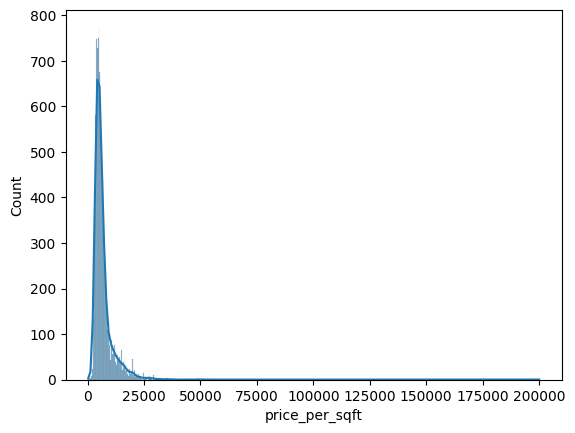

In [200]:
sns.histplot(data=df5,x=df5.price_per_sqft, kde=True)

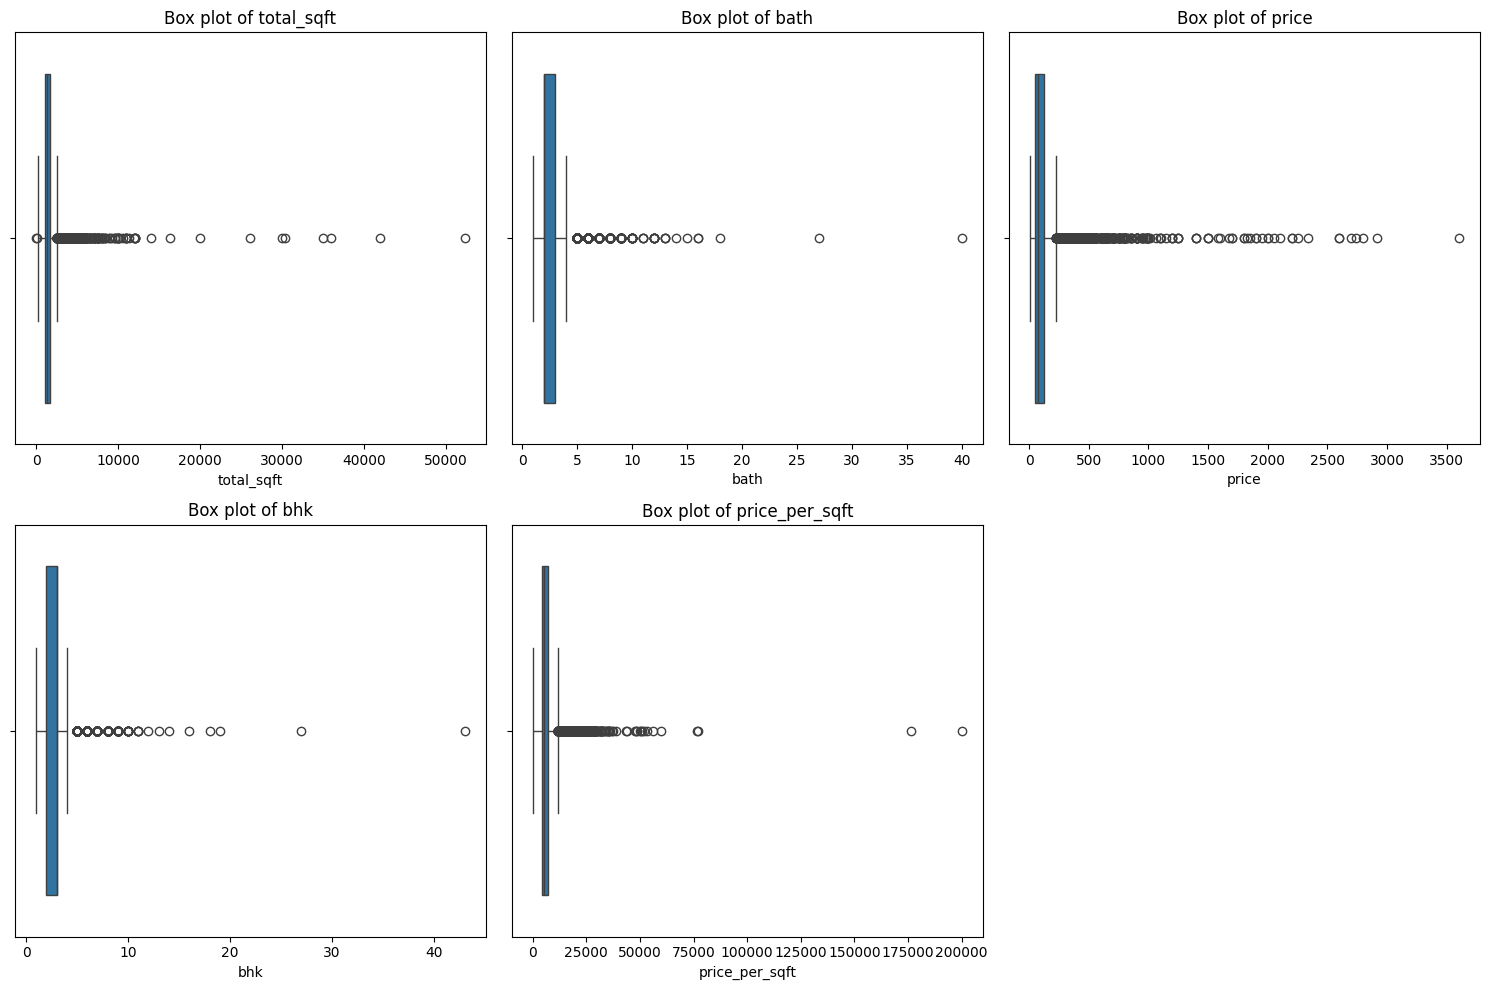

In [201]:
plt.figure(figsize=(15, 10))
numerical_cols=['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df5[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [216]:
df5['log_price_per_sqft']=np.log(df5["price_per_sqft"])
df5

C:\Users\Admin\AppData\Local\Temp\ipykernel_10544\3305913244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['log_price_per_sqft']=np.log(df5["price_per_sqft"])


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score,ZScore,log_price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039859,-0.039859,8.215818
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.031624,-0.031624,8.437067
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.034411,-0.034411,8.367532
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.016970,-0.016970,8.739536
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034906,-0.034906,8.354674
...,...,...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.012979,-0.012979,8.808220
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.026776,0.026776,9.315691
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.025843,-0.025843,8.567506
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.020447,0.020447,9.250234


<Axes: xlabel='log_price_per_sqft', ylabel='Count'>

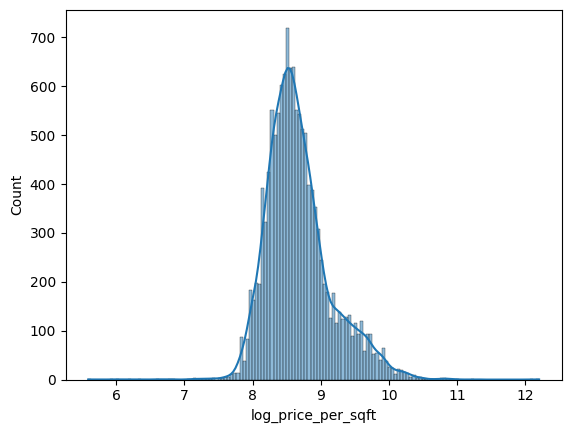

In [218]:
sns.histplot(data=df5,x=df5.log_price_per_sqft, kde=True)

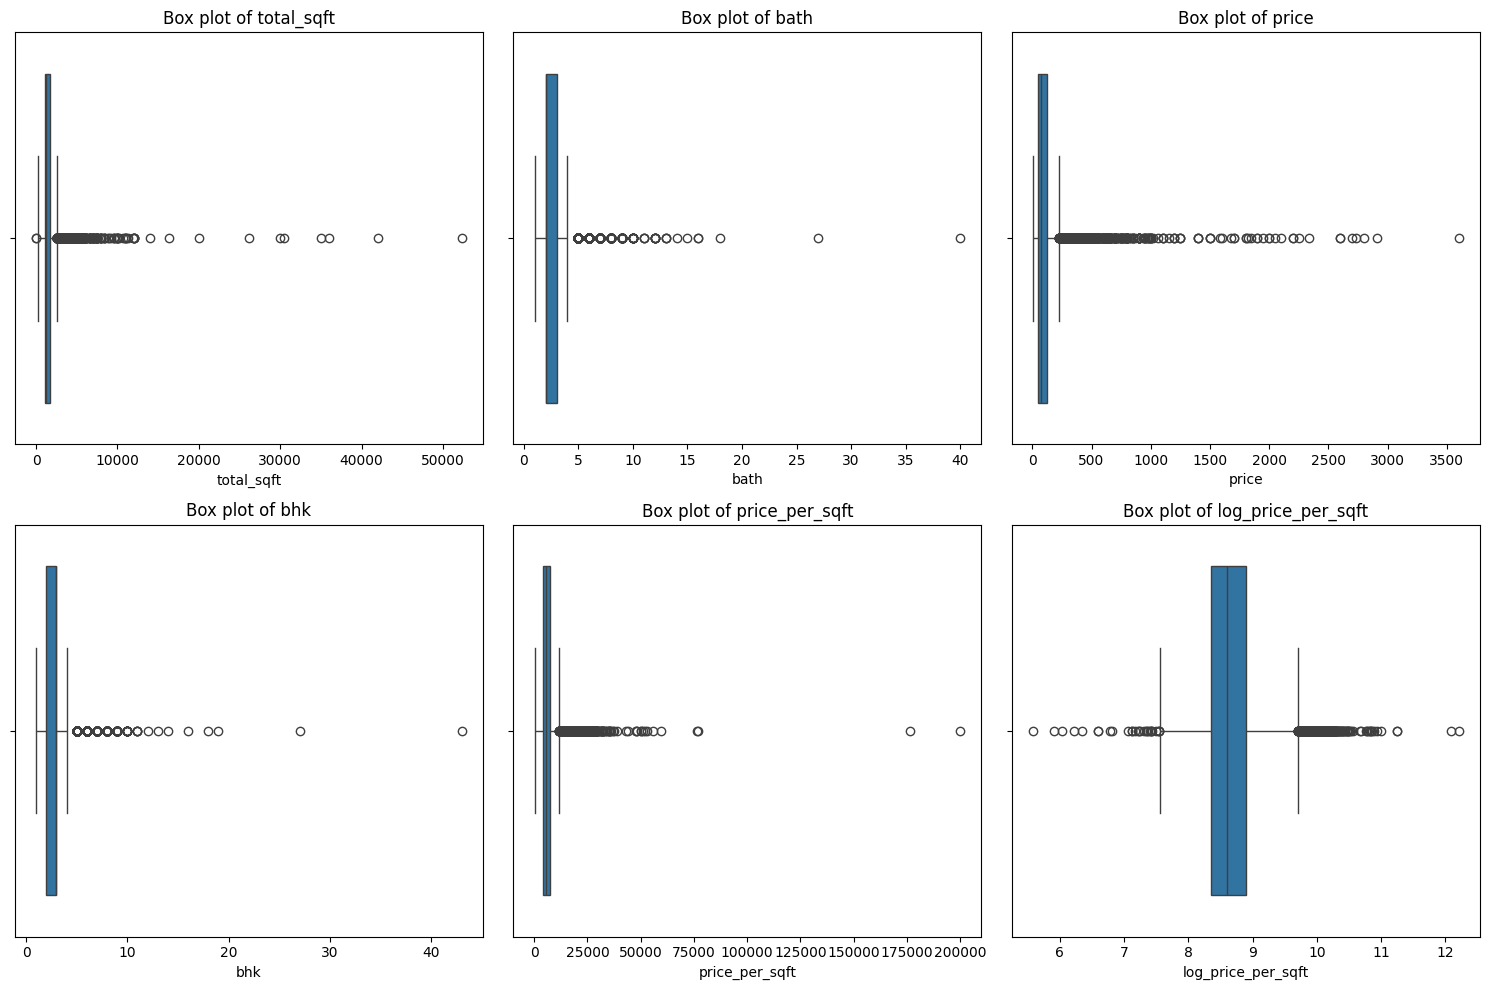

In [245]:
plt.figure(figsize=(15, 10))
numerical_cols=['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft','log_price_per_sqft']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df5[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [246]:
df5.log_price_per_sqft.skew()

0.8737833732670625

In [220]:
kurtosis(df5['log_price_per_sqft'],fisher=False)

4.9122296910750824

#### From ZScore method we got a moderately skewed normal distribution.